In [140]:
import numpy
import scipy
import pandas
import math
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import img_as_float
from skimage.viewer import ImageViewer

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [10]:
image = imread(u'C:\\Users\\Dmi\\Desktop\\MatLab\\Coursera\\Введение в машинное обучение\\Неделя 6\\parrots.jpg')
img = mpimg.imread(u'C:\\Users\\Dmi\\Desktop\\MatLab\\Coursera\\Введение в машинное обучение\\Неделя 6\\parrots.jpg')

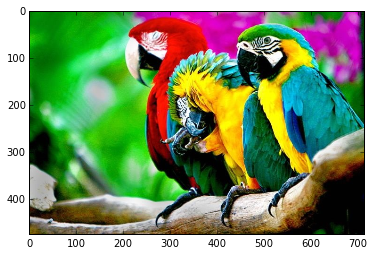

In [100]:
imgplot = plt.imshow(img)

In [125]:
image_float = img_as_float(image)
print image_float.shape
# print image_float
# viewer = ImageViewer(image)
# viewer.show()

(474, 713, 3)


In [126]:
r = image_float[:, :, 0].ravel()
g = image_float[:, :, 1].ravel()
b = image_float[:, :, 2].ravel()
# print r
# print g
# print b

rgb = numpy.transpose(numpy.vstack((r, g, b)))
print rgb

[[ 0.01176471  0.49019608  0.01568627]
 [ 0.01176471  0.49019608  0.01568627]
 [ 0.00784314  0.49411765  0.00784314]
 ..., 
 [ 0.03921569  0.08235294  0.10588235]
 [ 0.09411765  0.14901961  0.18431373]
 [ 0.10196078  0.15294118  0.21568627]]


In [127]:
kM = KMeans(init = 'k-means++', 
            random_state = 241)
kM.fit(rgb)
cl = kM.labels_
colors_avg = kM.cluster_centers_
print colors_avg

[[ 0.77478959  0.09198666  0.68851125]
 [ 0.09698533  0.63570025  0.06890763]
 [ 0.95189382  0.82740675  0.05120967]
 [ 0.45498838  0.66975104  0.44565694]
 [ 0.05474744  0.11804664  0.05175085]
 [ 0.78999227  0.82397855  0.79633815]
 [ 0.05197162  0.54658957  0.58717785]
 [ 0.60243537  0.2194432   0.07222053]]


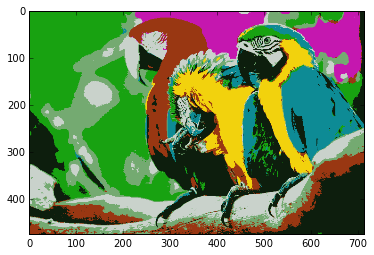

In [137]:
cl_img = numpy.reshape(cl, (-1, 713))
img_new = numpy.copy(image_float)
for cluster in range(0, kM.n_clusters):
    #mean_r = numpy.median(img_new[:, :, 0][cl_img == cluster])
    #mean_g = numpy.median(img_new[:, :, 1][cl_img == cluster])
    #mean_b = numpy.median(img_new[:, :, 2][cl_img == cluster])
    # print [mean_r, mean_g, mean_b]
    img_new[cl_img == cluster] = colors_avg[cluster]
plt.imshow(img_new)

[0.77478959242516476, 0.091986655168604159, 0.68851124990208779]
[0.096985332572315341, 0.63570025488255899, 0.068907628133410476]
[0.95189382286367175, 0.82740674757138, 0.051209668162055744]
[0.45498837845065321, 0.66975103935296931, 0.44565693694197006]
[0.054747437445619218, 0.11804664120193681, 0.051750853239323297]
[0.78999226673758149, 0.82397854570592077, 0.79633815419475473]
[0.05197161874996431, 0.54658956810738757, 0.5871778531332994]
[0.60243537075909337, 0.2194431983535502, 0.07222053397007161]


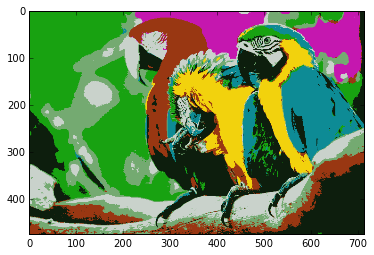

In [133]:
img_new_1 = numpy.copy(image_float)
for cluster in range(0, kM.n_clusters):
    median_r = numpy.median(img_new[:, :, 0][cl_img == cluster])
    median_g = numpy.median(img_new[:, :, 1][cl_img == cluster])
    median_b = numpy.median(img_new[:, :, 2][cl_img == cluster])
    print [median_r, median_g, median_b]
    img_new_1[cl_img == cluster] = [median_r, median_g, median_b]
plt.imshow(img_new_1)

In [150]:
def PSNR(image1, image2):
    """Function calculates PSNR metrics between two images"""
    mse = numpy.mean((image1 - image2) ** 2)
    psnr = 10 * math.log10(numpy.max(image1) / mse)
    return psnr

In [153]:
print PSNR(image_float, img_new)

22.7870559438


1 9.88419456811
2 12.1737490627
3 13.2388232872
4 14.4374052699
5 15.616645557
6 16.6291503278
7 17.7208478924
8 18.5038049342
9 19.1860323363
10 19.7163778372
11 20.2030868934
12 20.6746316192
13 21.0984653225
14 21.403950176
15 21.683240352
16 21.940647654
17 22.2019658316
18 22.3770638718
19 22.5969336426
20 22.7870559438


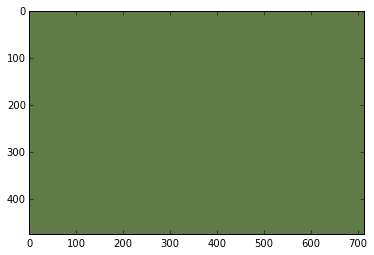

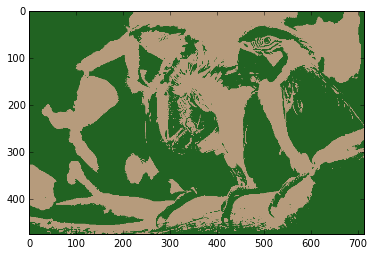

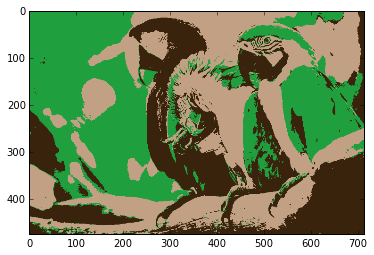

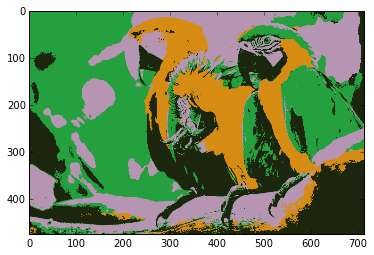

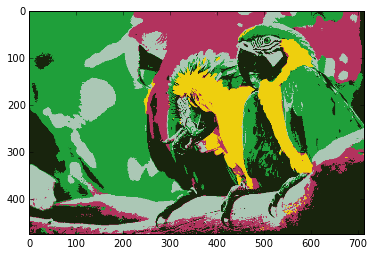

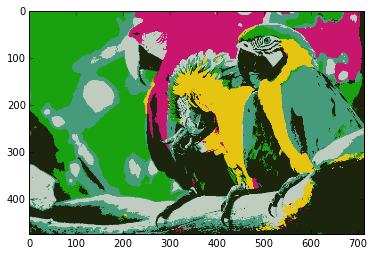

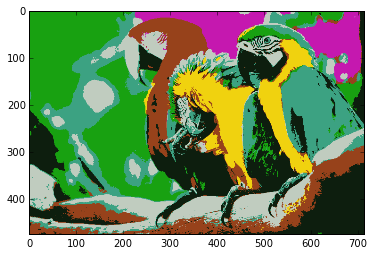

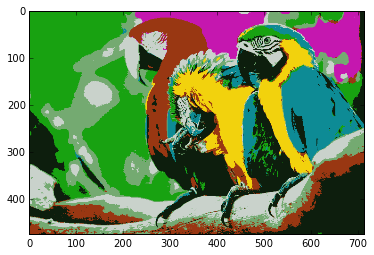

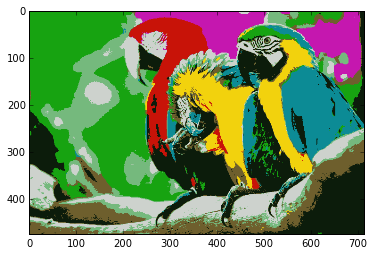

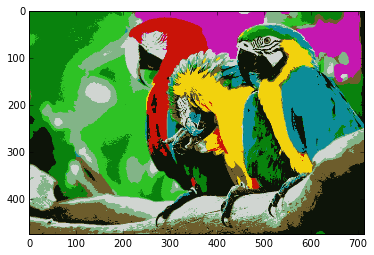

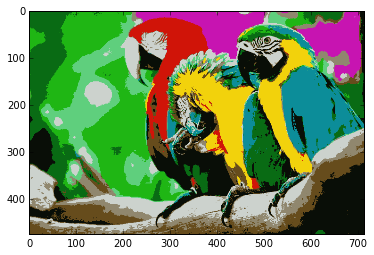

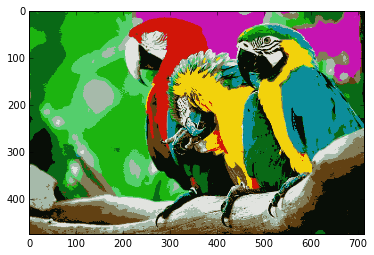

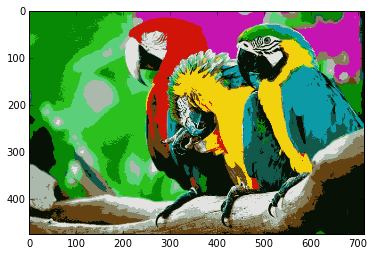

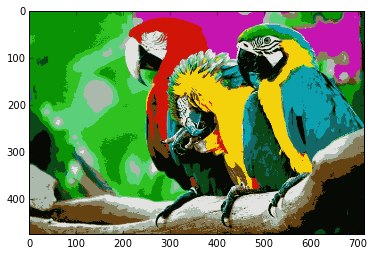

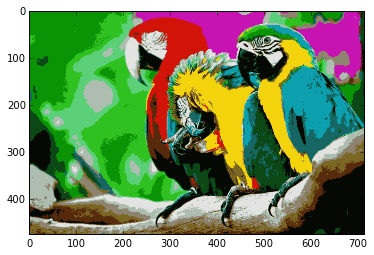

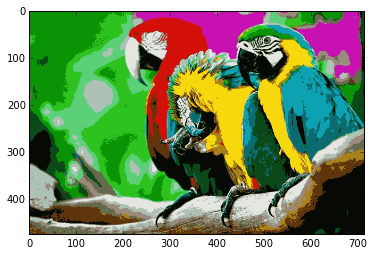

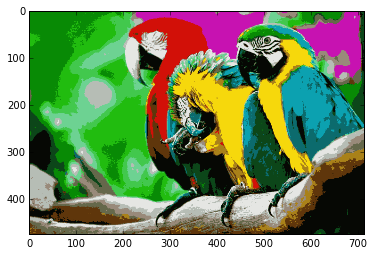

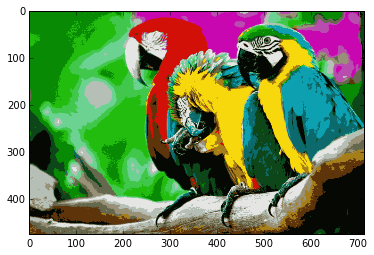

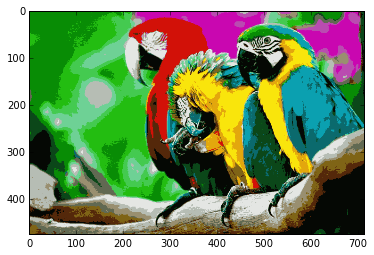

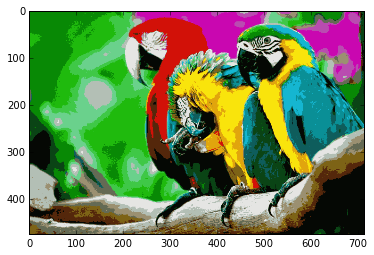

In [154]:
for i in range(1, 21):
    kM = KMeans(n_clusters = i,
                init = 'k-means++', 
                random_state = 241)
    kM.fit(rgb)
    cl = kM.labels_
    colors_avg = kM.cluster_centers_
    cl_img = numpy.reshape(cl, (-1, 713))
    img_new = numpy.copy(image_float)
    for cluster in range(0, i):
        img_new[cl_img == cluster] = colors_avg[cluster]
    print i, PSNR(image_float, img_new)
    plt.figure()
    plt.imshow(img_new)